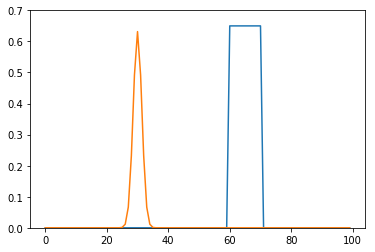

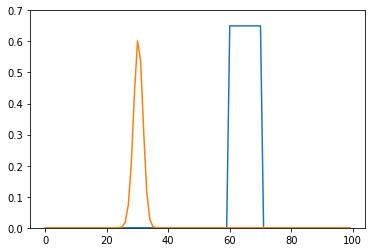

30.228161104316012
0.7231910407570527


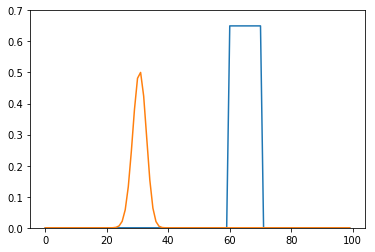

30.64037393459556
0.49592474096571126


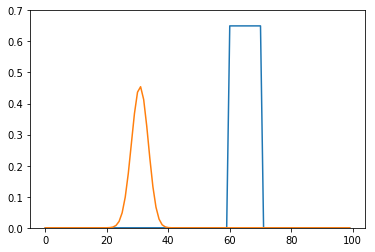

30.76249938412808
0.37735876860239453


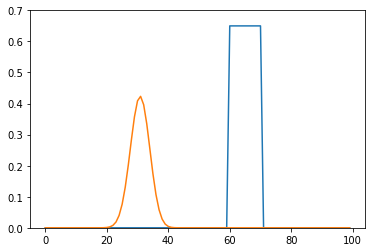

30.823730320059646
0.30880798366347006


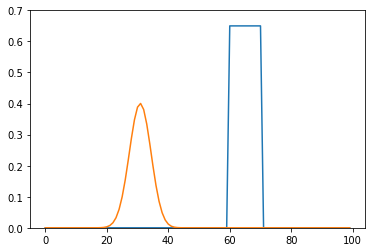

30.86098373725142
0.2642051920321613


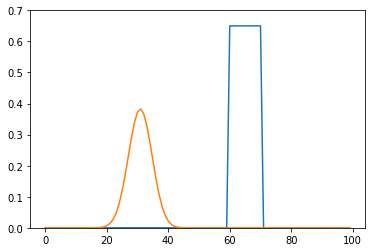

30.88613952460814
0.23276869967841984


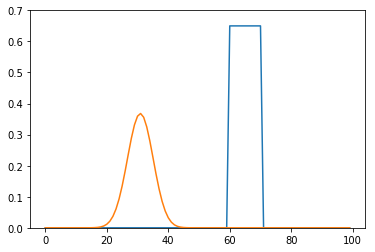

30.904298489829323
0.20933436967850894


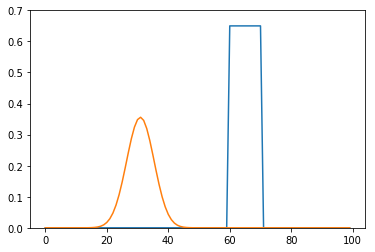

30.918035035570632
0.19113113226312295


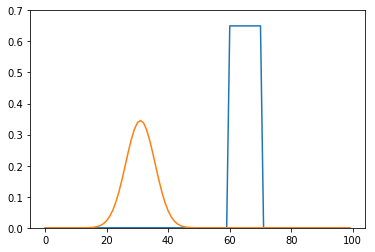

30.92879438077465
0.17654023563599533


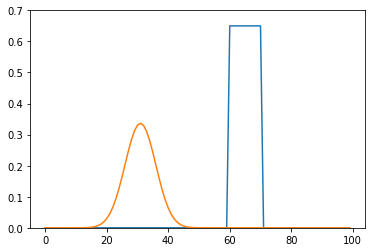

30.93745221102366
0.16455244951996417


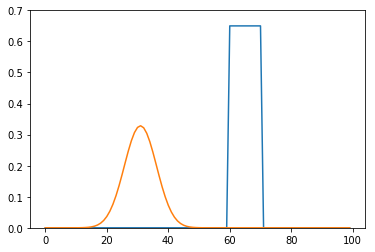

30.944570709731877
0.15450542395840228


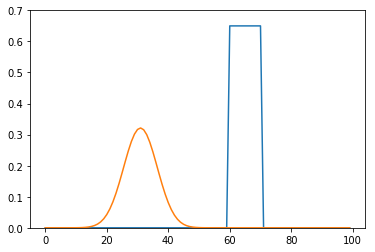

30.950527593695725
0.14594607709212173


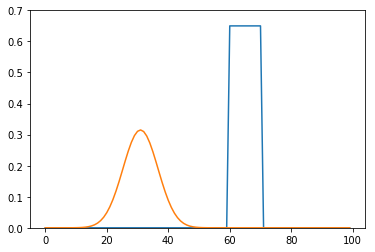

30.95558615788225
0.13855371967618313


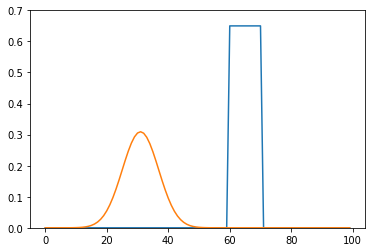

30.959935611308776
0.13209478891385515


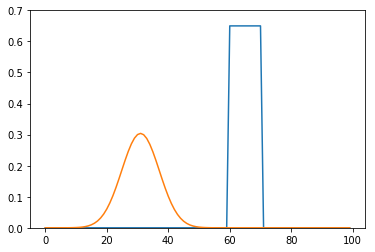

30.96371545289977
0.12639499702154852


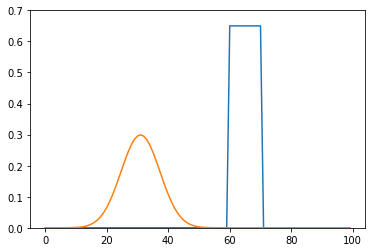

30.967030807177988
0.1213215443897128


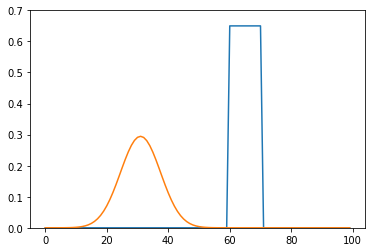

30.969962407446225
0.1167713913204912


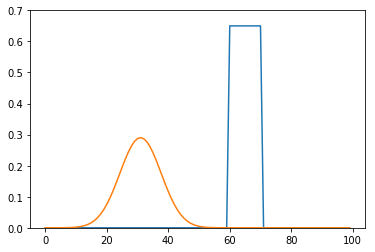

30.972573288377813
0.11266330719408826


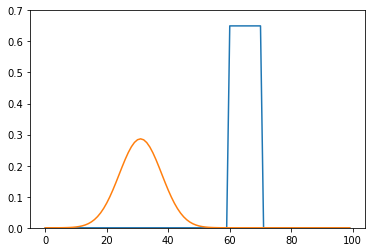

30.974913389447718
0.10893234796558272


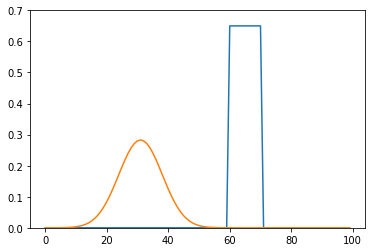

30.9770227952685
0.10552593729251508


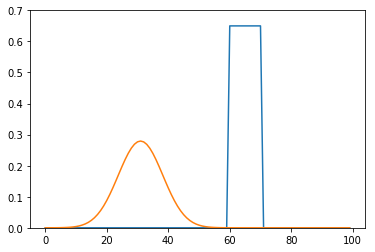

30.97893406715042
0.10240103225560111


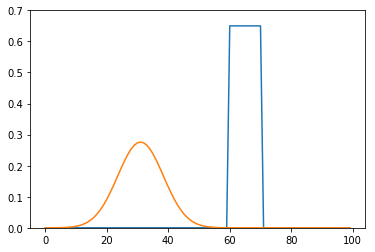

30.98067396208668
0.09952203843199188


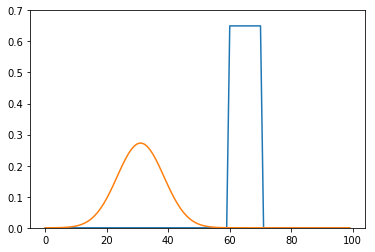

30.982264747262228
0.09685925267632339


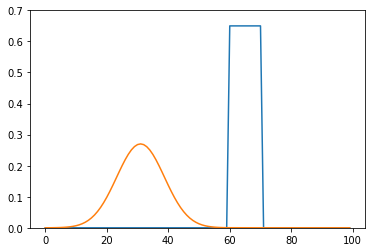

30.98372528708269
0.09438768393204368


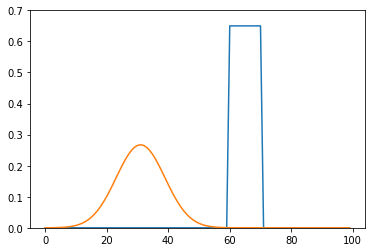

30.985072130724397
0.09208614918841417


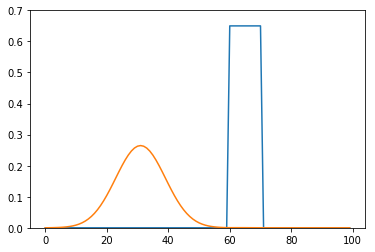

30.986321074713157
0.0899365734885518


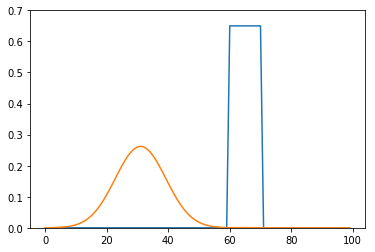

30.98749048777062
0.08792344727108091


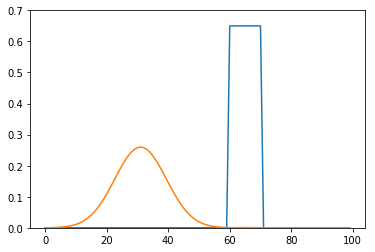

30.98861022621795
0.0860334201207589


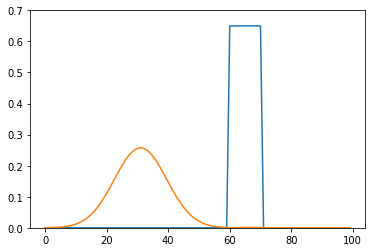

30.989747866465986
0.08425505584943287


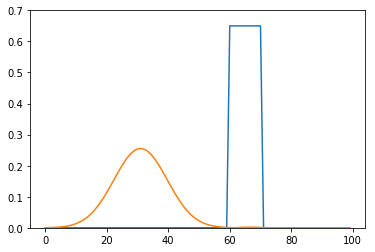

30.991088595370126
0.08257899618529378


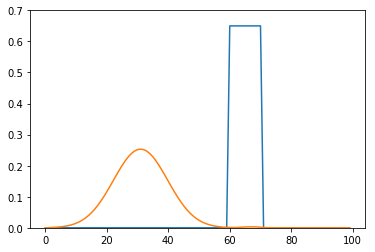

30.993182079064344
0.08099830567113903


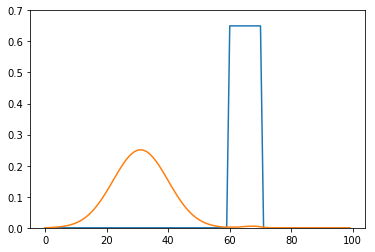

30.997711022188277
0.07950883766394204


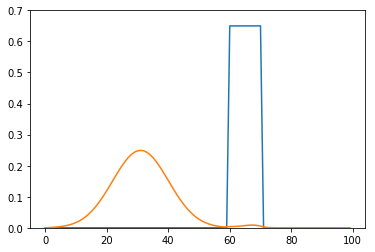

31.009893557065947
0.07811666076728825


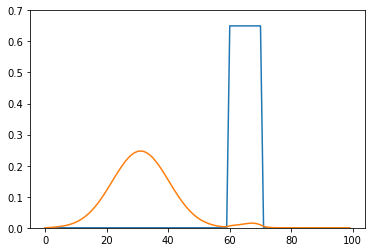

31.045998122206264
0.07685501559862225


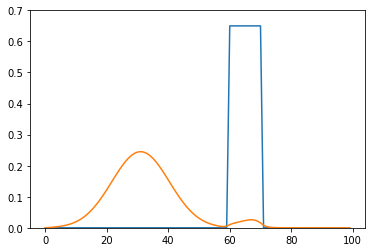

31.156708170485956
0.07583235261889525


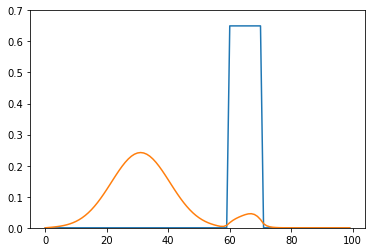

31.49793859995693
0.07538956476932351


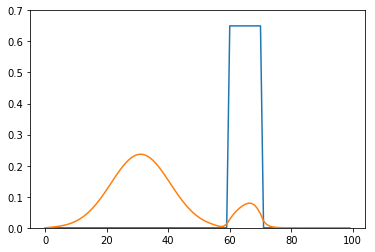

32.52744670779363
0.07655338009665585


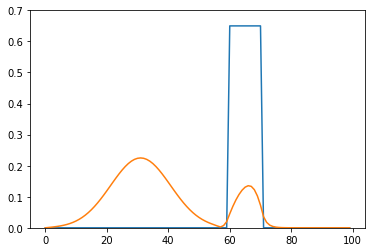

35.400918182451974
0.08195389274136372


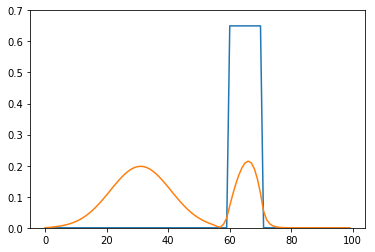

41.900001306716355
0.09567525145848445


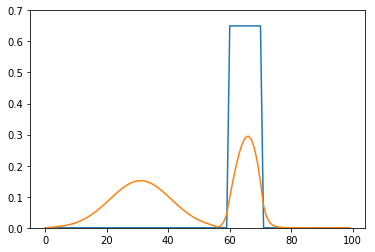

51.47661974358206
0.1165467038248066


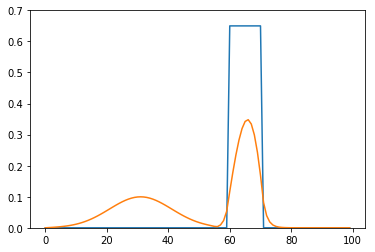

59.34256757218408
0.13369145463925255


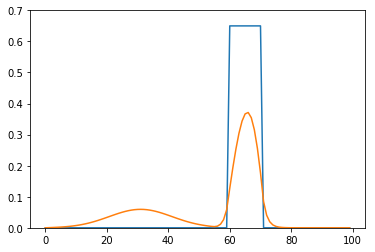

63.2322354575453
0.1419273216846977


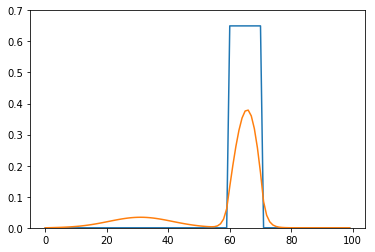

64.66302881151444
0.1446669115739879


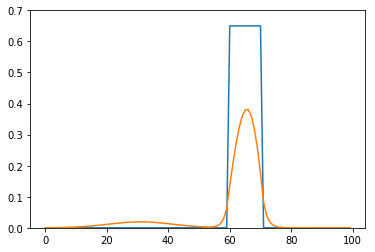

65.11282525054769
0.14524479796950326


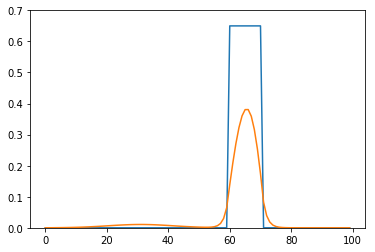

65.2307493977984
0.14512332849352164


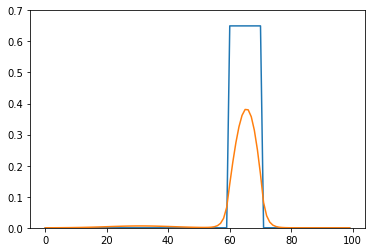

65.24396622050394
0.1448112423500318


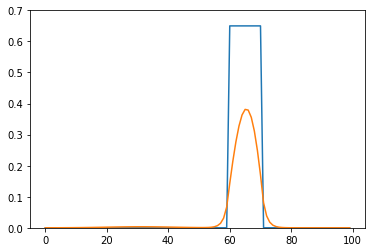

65.22633189179629
0.14447073437674546


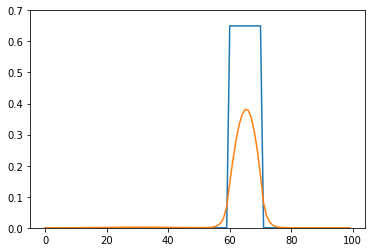

65.20121349527548
0.14414997948368927


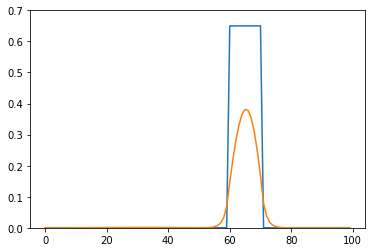

65.17584554444728
0.14386073557133694


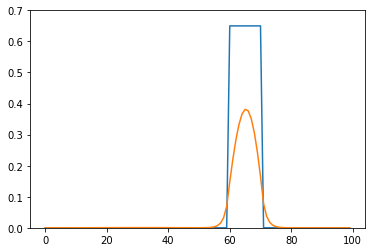

65.15235383586528
0.14360351812173505


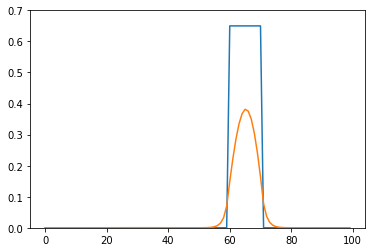

65.13125071055714
0.14337572485441002


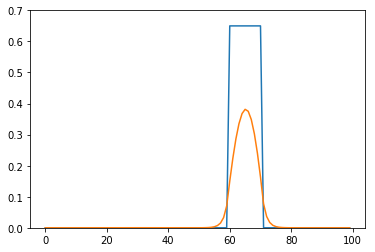

65.11254120568339
0.1431741981542773


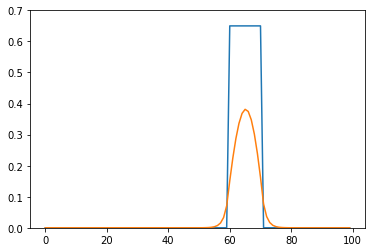

65.09607451358828
0.1429959722958295


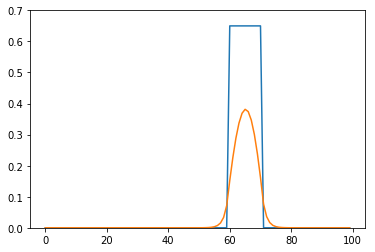

65.08165693662451
0.14283843421633713


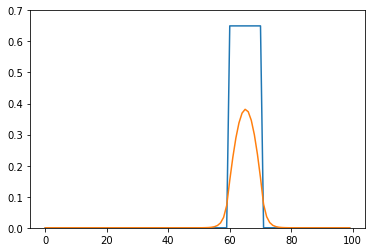

65.06908907204011
0.14269930724357574


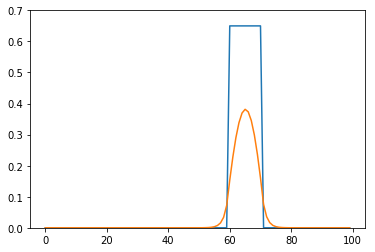

65.05817857229796
0.14257659434211126


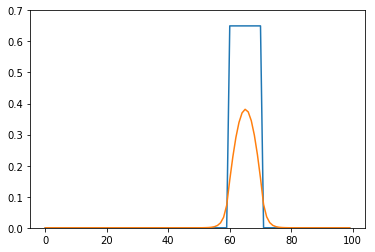

65.04874475246774
0.14246852388408884


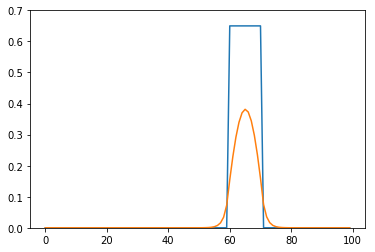

65.04062026749419
0.14237350826885695


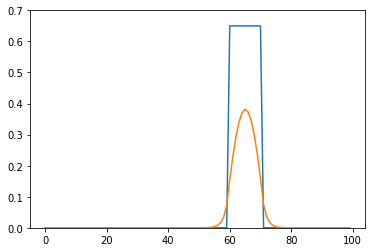

65.03365159143843
0.1422901151866067


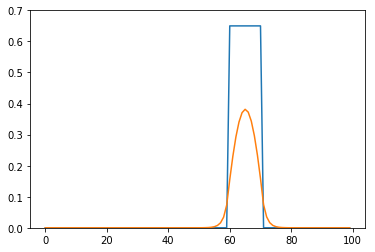

65.02769891742629
0.1422170481340025


In [21]:
import numpy as np
import matplotlib.pyplot as plt

D = 1.0
INIT_X_MU = 30
INIT_P_MU = 400
MAX_TIME = 300
DT = 1

ys_t = []
ys_abs_t = []

def initial_wave_func(x, d, x_mu, p_mu):
    return (1 / (2.0 * np.pi * d**2)**(1/4)) * np.exp(-(x-x_mu)**2 / (4.0 * d**2)) * (np.cos(p_mu * x) + 1j*np.sin(p_mu * x))

def V(x):
    POTENTIAL_H = 0.65
    return POTENTIAL_H if x >= 60 and x <= 70 else 0
    #return 0

def x_mean(xs, ys):
    return sum(abs(np.conj(ys)*xs*ys))

def p_mean(xs, ys):
    ys_grad = np.gradient(ys)
    return sum(abs(np.conj(ys)*(1j)*ys_grad))

def calc_next_state(xs, ys):
    assert (len(xs) == len(ys)), 'dimension xs and ys does not match.{} != {}'.format(len(xs), len(ys))
    next_state = []
    for i, (x,y) in enumerate(zip(xs, ys)):
        if i == 0 or i == len(ys)-1:
            next_state.append(0+0j)
        else:
            next_state.append(ys[i] - (0.5j)*((ys[i-1] - 2*ys[i] + ys[i+1]) - V(x)*ys[i])*DT)
            
    next_state = np.array(next_state)
            
    next_state /= sum(abs(next_state*next_state))**(1/2)
    return next_state


xs = np.array([i for i in range(100)])
ys = np.array(list(map(lambda x: initial_wave_func(x, D, INIT_X_MU, INIT_P_MU), xs)))
# 規格化
ys /= sum(abs(ys*ys))**(1/2)
ys_t.append(ys.copy())

ys_abs = list(map(lambda x: abs(x), ys))
ys_abs_t.append(ys_abs.copy())

plt.ylim([0, 0.7])

plt.plot(xs, [V(x) for x in xs])
plt.plot(xs, ys_abs)
plt.show()

for t in range(MAX_TIME):
    #print(ys_t[-1])
    ys = calc_next_state(xs, ys_t[-1])
    ys_t.append(ys.copy())
    ys_abs = list(map(lambda x: abs(x), ys))
    ys_abs_t.append(ys_abs.copy())
    
    if t % 5 == 0:
        plt.ylim([0, 0.7])
        # ポテンシャル壁プロット
        plt.plot(xs, [V(x) for x in xs])
        # 波束プロット
        plt.plot(xs, ys_abs)
        plt.show()
        print(x_mean(xs, ys))
        print(p_mean(xs, ys))

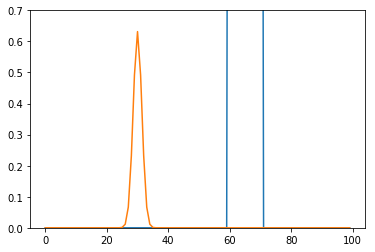

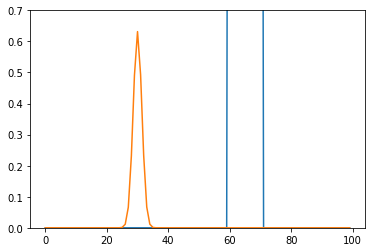

30.003754453396827
0.7790744289480411


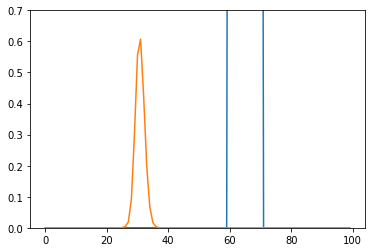

30.75347548035824
0.7803904864715766


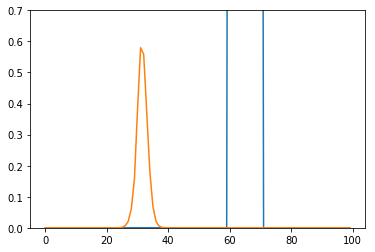

31.50086378614463
0.7841337100980751


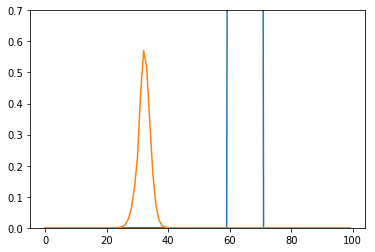

32.24591191726309
0.7847107264155141


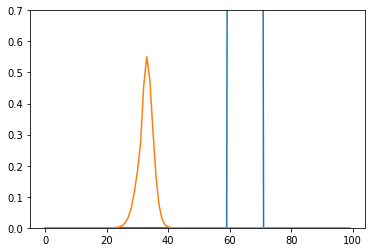

32.98861256674269
0.7810102267985154


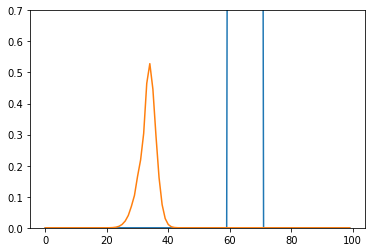

33.728958574814925
0.7756097740465091


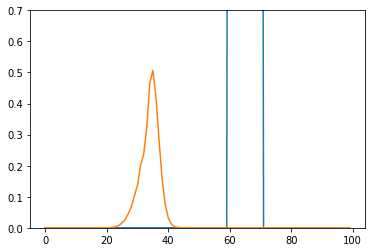

34.46694292956346
0.7705955161701052


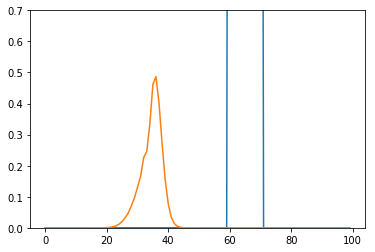

35.202558767541326
0.7663777464126007


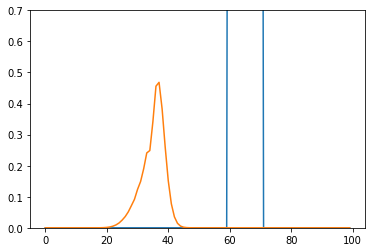

35.935799374356634
0.7627981180908003


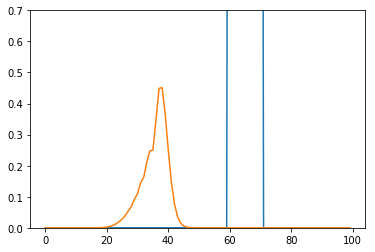

36.666658185226055
0.7597301226651807


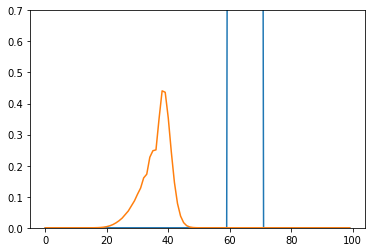

37.39512878549675
0.7570574257326347


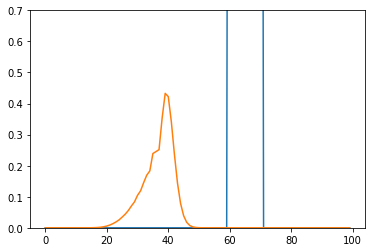

38.12120491113544
0.7546747514618338


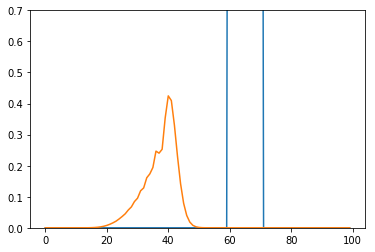

38.844880449186256
0.7525237329814338


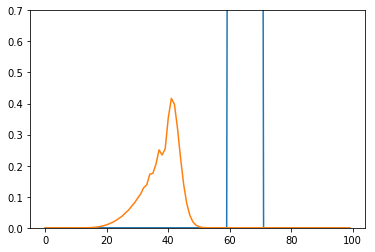

39.56614943819565
0.7505570013733199


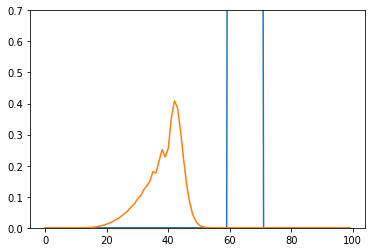

40.285006068605526
0.7487234929442882


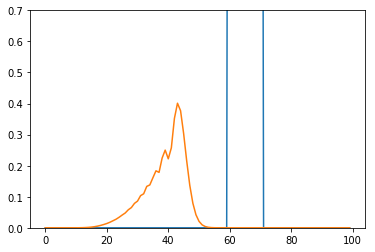

41.00144468311397
0.7469972748423388


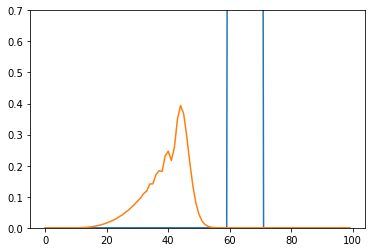

41.715459776998884
0.7453563653378876


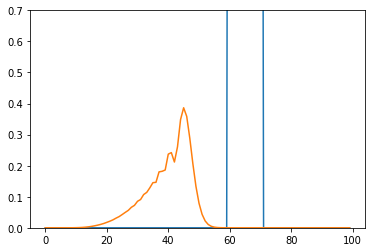

42.42704599833634
0.7437782490091492


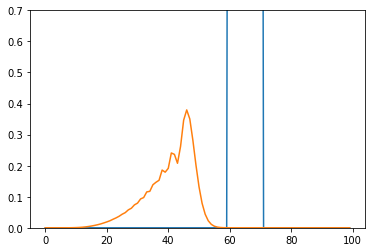

43.136198147280034
0.7422590903772971


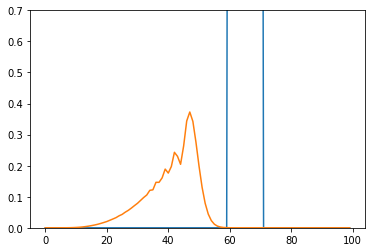

43.84291116630103
0.7407888248185587


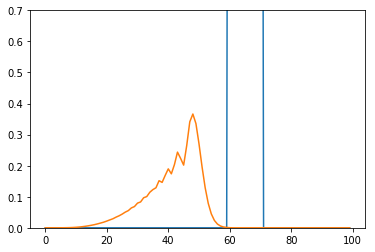

44.54718005752706
0.7393542482711196


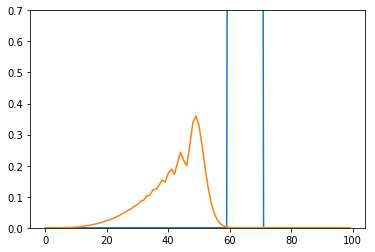

45.24899931491835
0.7379527253437819


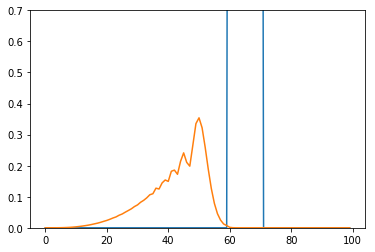

45.948359678681825
0.7365704685870887


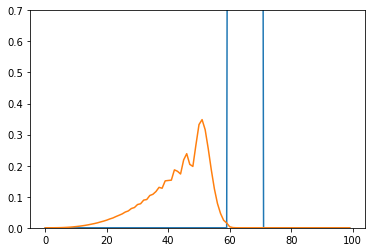

46.645232584475025
0.7351780710044138


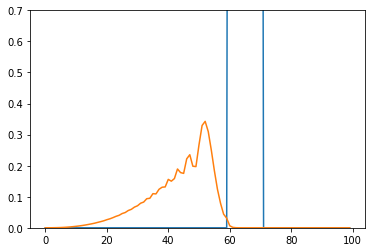

47.33950751512524
0.7336842545953314


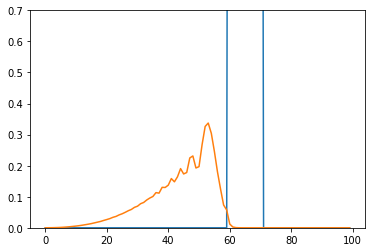

48.03077993283991
0.7317723019032638


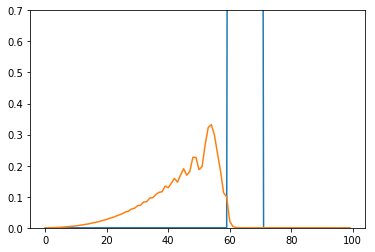

48.71775147924099
0.7285752904336215


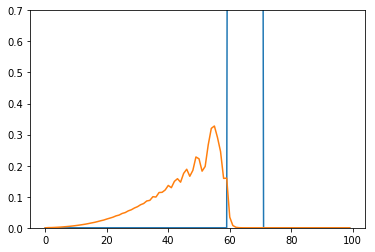

49.3968319361354
0.722133984928629


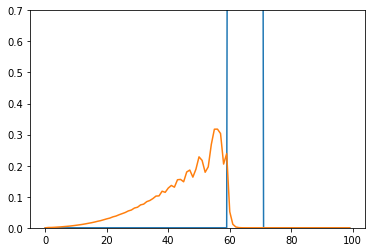

50.059533760586376
0.7089793558841133


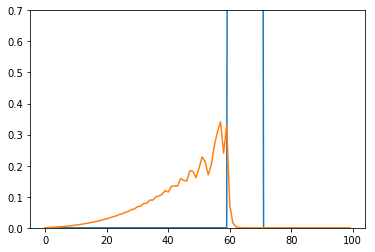

50.688867280198856
0.6850836496072015


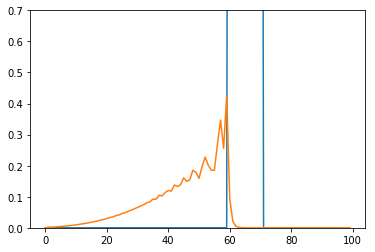

51.25652653986456
0.6493873126909576


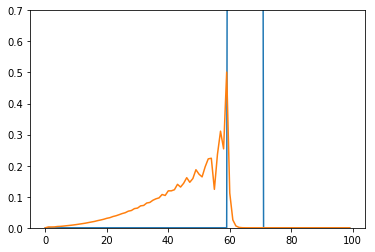

51.724566434244544
0.610129932579552


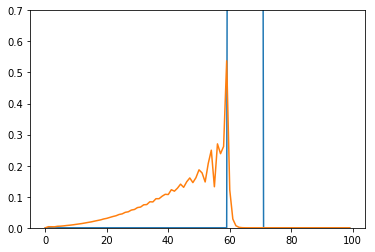

52.05518992055569
0.5800797156709914


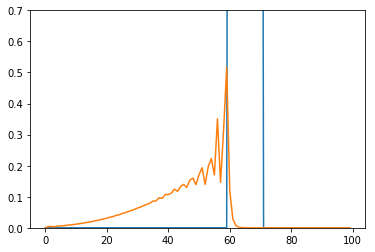

52.227531577113666
0.5582269564086917


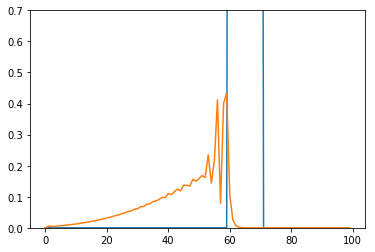

52.252045204766276
0.551194448404188


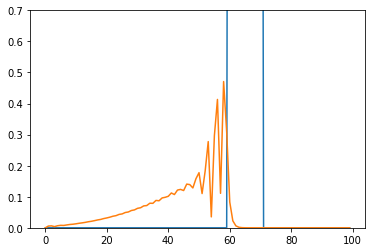

52.16899612175372
0.5387675346126389


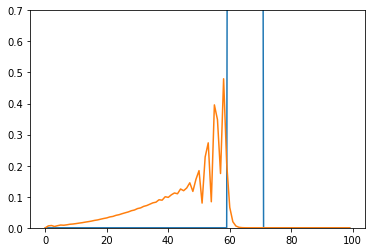

52.02651221924459
0.5388855845961039


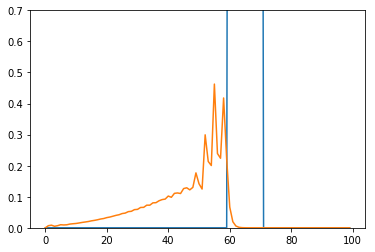

51.85271433454805
0.5458846872525448


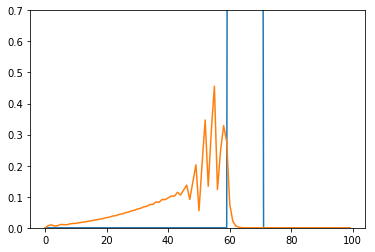

51.646325816931636
0.5474071445479218


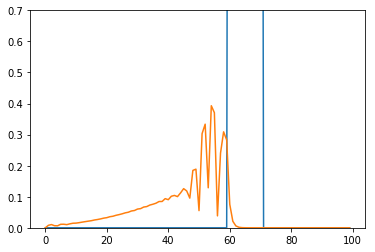

51.394268317606716
0.5486747058070319


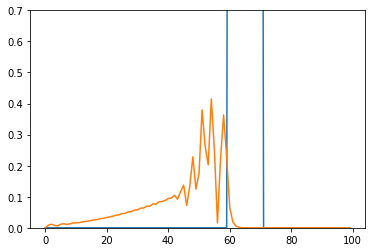

51.09577246171693
0.5678583405670209


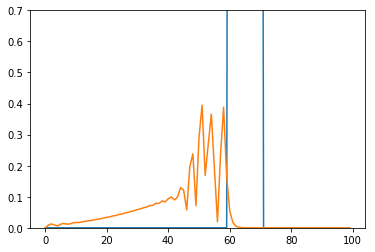

50.76566884890347
0.5617485927316933


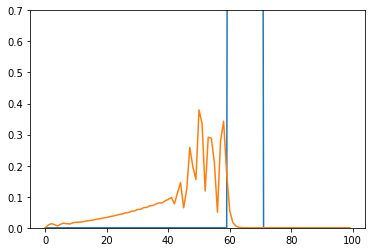

50.416898782729135
0.5802772875598391


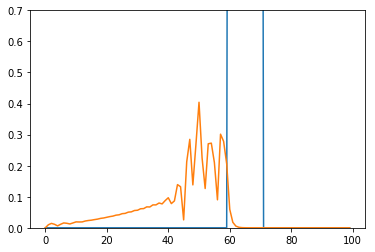

50.04879460576154
0.5878705492955265


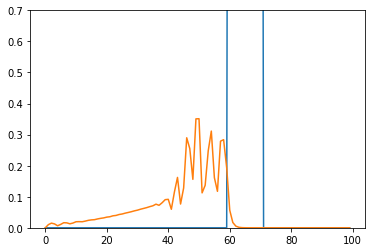

49.65606639244441
0.6017274841224128


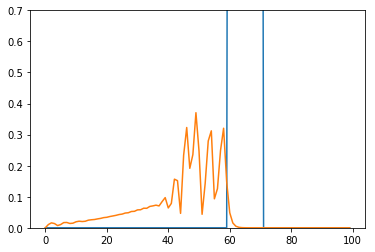

49.24168002422568
0.6045846370069774


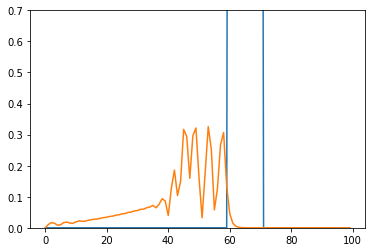

48.8137779189197
0.6136105013366948


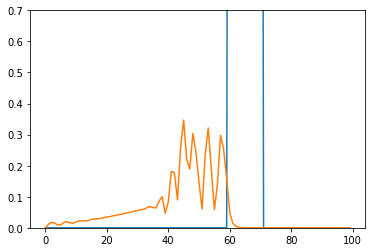

48.37474890433283
0.6198625620375549


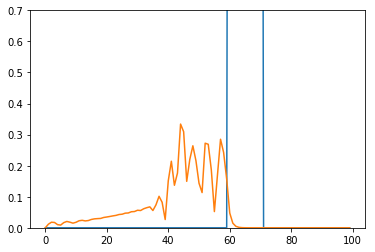

47.9216428364215
0.619193573473854


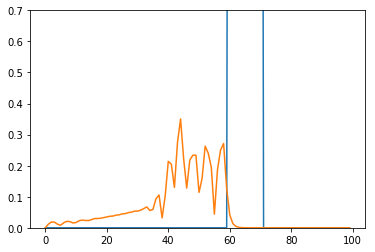

47.455021674576294
0.6181169145475657


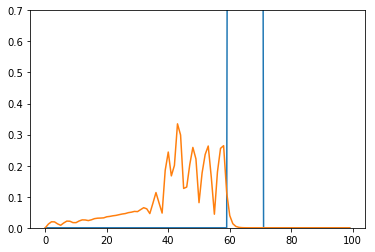

46.979549111916036
0.6254006295555569


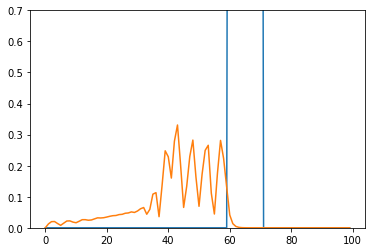

46.49696904416011
0.6321001189790684


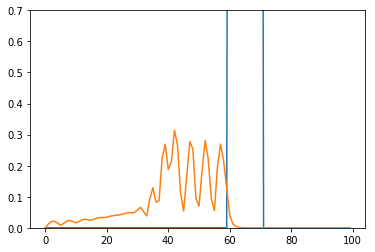

46.00555702444982
0.6377487783413257


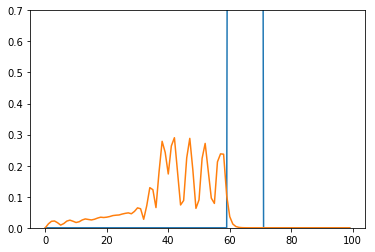

45.505834137113325
0.6399953889094051


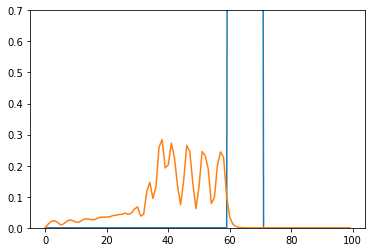

45.00073104720365
0.6436138423977703


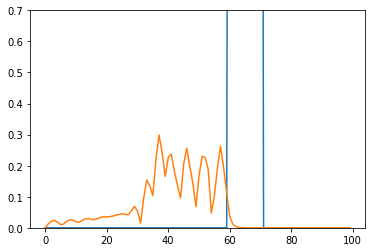

44.49095387307901
0.6409161266232607


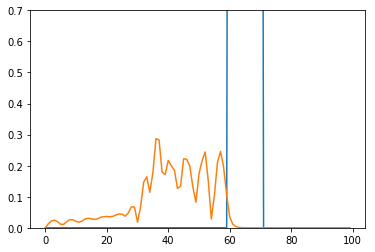

43.97540704582923
0.642152090218266


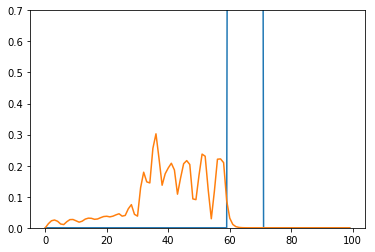

43.454946218876934
0.6431577232986289


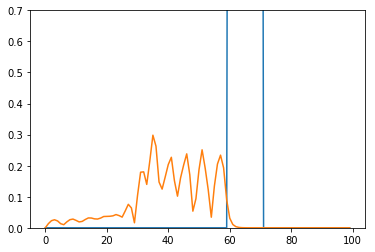

42.931412401569716
0.6463105746021195


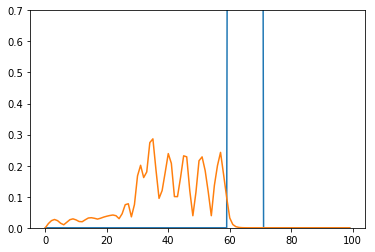

42.404738497165084
0.6499812626836643


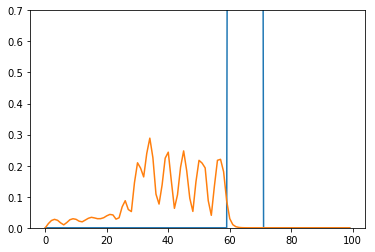

41.87438811159366
0.6504295554869346


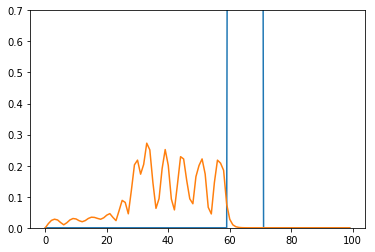

41.341426390532526
0.6508085727343665


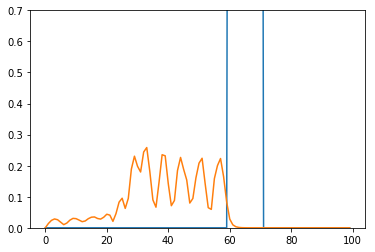

40.80679488239789
0.6546120449590844


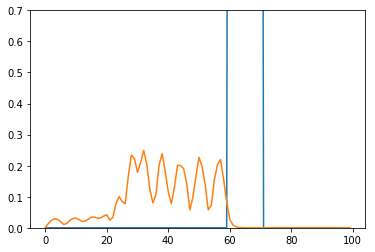

40.27006905216228
0.6556823940365583


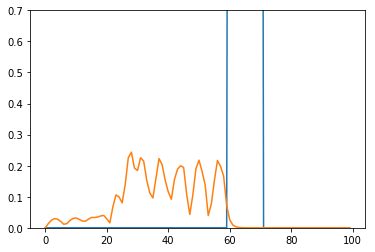

39.731281183987676
0.6529155560043587


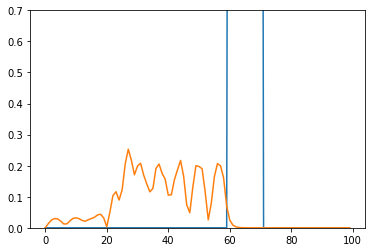

39.19140003802851
0.6514898430976633


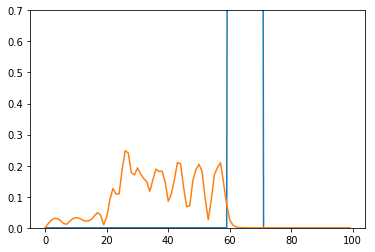

38.650640049386396
0.6534785952322236


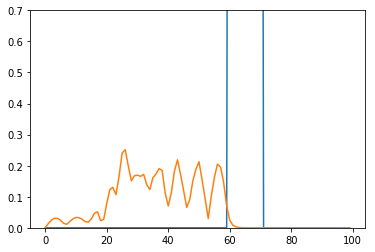

38.108645954274095
0.6552327899293982


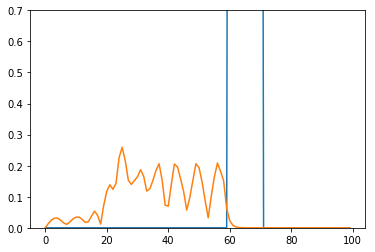

37.56586608964447
0.6540851574959663


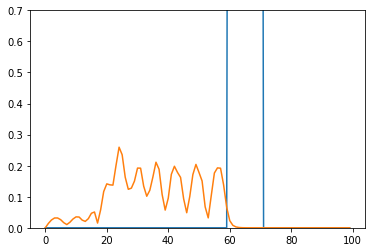

37.022884195356085
0.6529187673904198


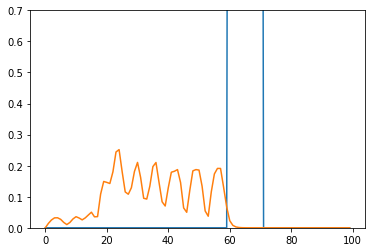

36.479510728180905
0.6530502898885672


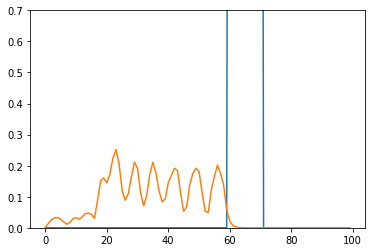

35.93572295078121
0.6542623865609178


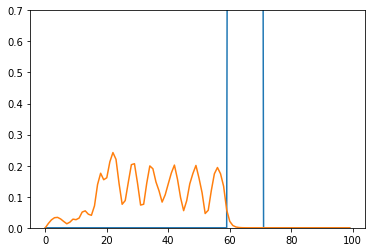

35.392058493072064
0.6548197804840138


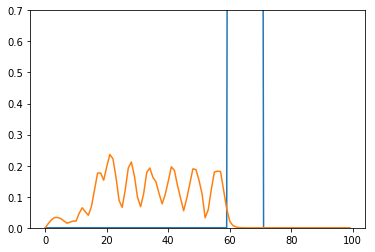

34.848642044982036
0.6537343563626081


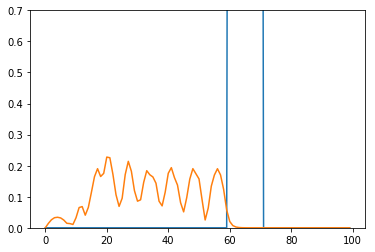

34.30527436771684
0.6525655701527437


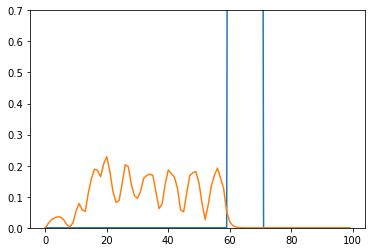

33.7622373955792
0.6515015164183184


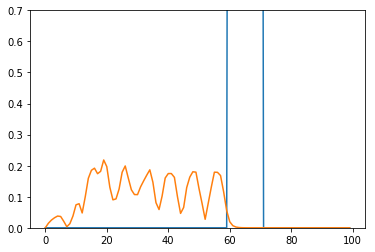

33.21985107532036
0.6514499556265718


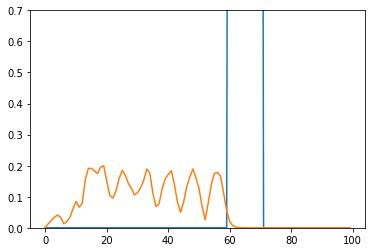

32.67797941192078
0.6518797430118526


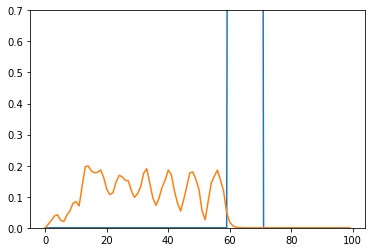

32.13664312912711
0.6517125753127428


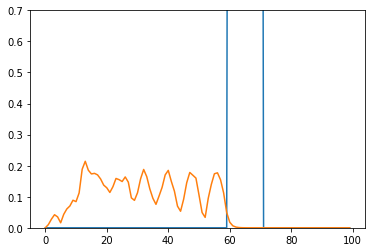

31.59614562364814
0.6511892651051502


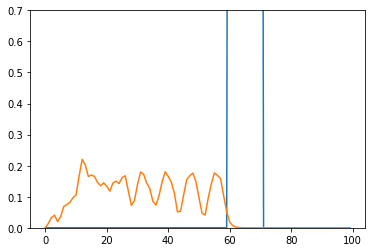

31.056492647742182
0.6499866548280945


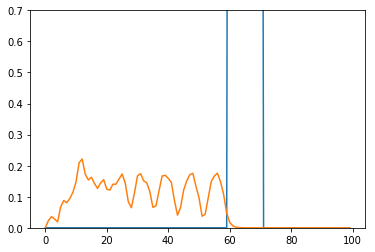

30.517638255619833
0.6487436372337501


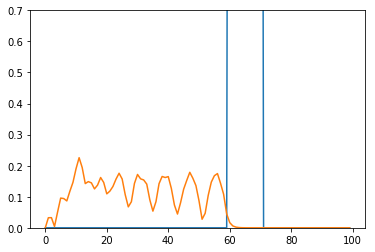

29.979963596598775
0.647610081911899


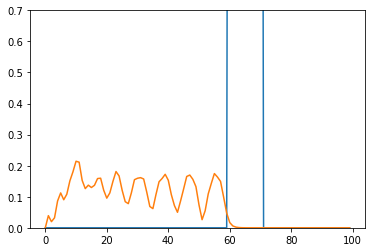

29.443860007566105
0.6471683128754636


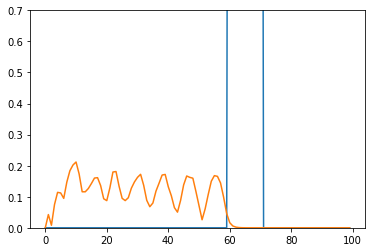

28.909446457510874
0.6451751297686007


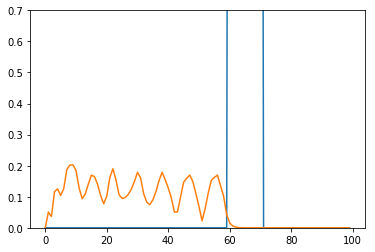

28.376965197522626
0.6440843228645764


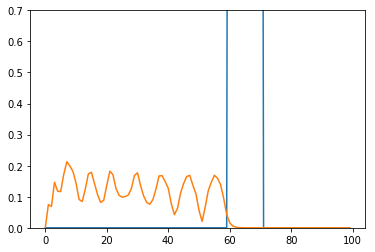

27.847028056058132
0.6416179748614855


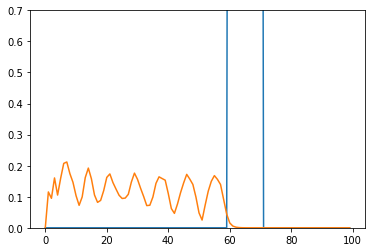

27.32115892011113
0.6359995859221899


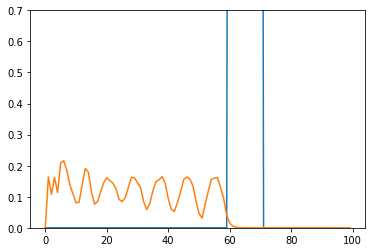

26.803164314397925
0.6259678845848685


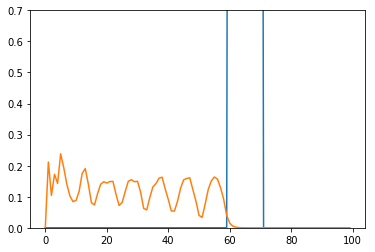

26.2997809674567
0.61073853464655


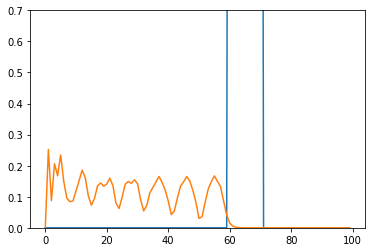

25.819580394843793
0.5878896055774747


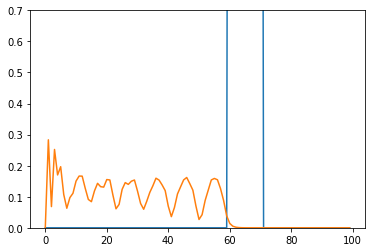

25.371345989033312
0.5585388997091457


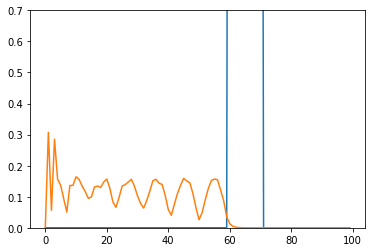

24.963005661967937
0.5300566503868377


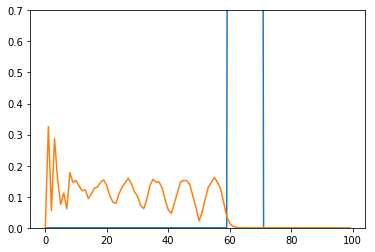

24.601157761695045
0.5114638771676023


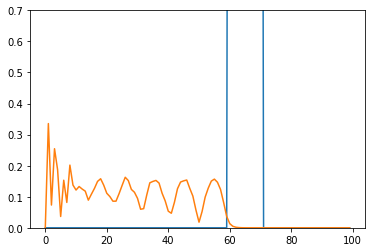

24.29078058935313
0.5086144988598253


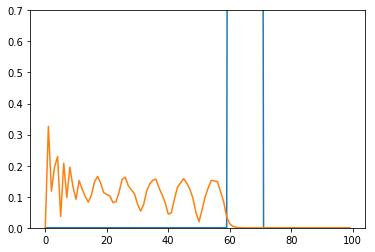

24.03384525012792
0.5178773890468127


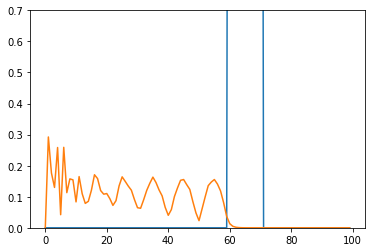

23.826501785538603
0.5212889256915847


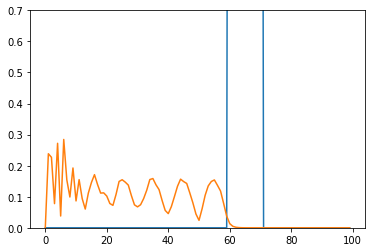

23.657935884995076
0.5084499973726394


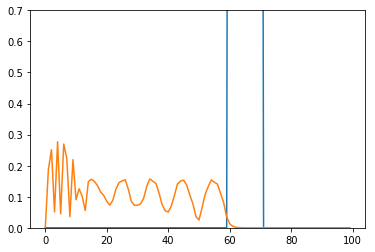

23.514087105804137
0.4906251190164368


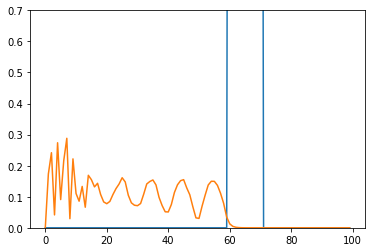

23.384418290549846
0.4947918164834044


In [22]:
import numpy as np
import matplotlib.pyplot as plt

D = 1.0
INIT_X_MU = 30
INIT_P_MU = 400
MAX_TIME = 20000
DT = 0.005

ys_t = []
ys_abs_t = []

def initial_wave_func(x, d, x_mu, p_mu):
    return (1 / (2.0 * np.pi * d**2)**(1/4)) * np.exp(-(x-x_mu)**2 / (4.0 * d**2)) * (np.cos(p_mu * x) + 1j*np.sin(p_mu * x))

def V(x):
    POTENTIAL_H = 5
    return POTENTIAL_H if x >= 60 and x <= 70 else 0
    #return 0

def x_mean(xs, ys):
    return sum(abs(np.conj(ys)*xs*ys))

def p_mean(xs, ys):
    ys_grad = np.gradient(ys)
    return sum(abs(np.conj(ys)*(1j)*ys_grad))

def calc_next_state(xs, ys):
    assert (len(xs) == len(ys)), 'dimension xs and ys does not match.{} != {}'.format(len(xs), len(ys))
    next_state = []
    for i, (x,y) in enumerate(zip(xs, ys)):
        if i == 0 or i == len(ys)-1:
            next_state.append(0+0j)
        else:
            next_state.append(ys[i] - (0.5j)*((ys[i-1] - 2*ys[i] + ys[i+1]) - V(x)*ys[i])*DT)
            
    next_state = np.array(next_state)
            
    next_state /= sum(abs(next_state*next_state))**(1/2)
    return next_state


xs = np.array([i for i in range(100)])
ys = np.array(list(map(lambda x: initial_wave_func(x, D, INIT_X_MU, INIT_P_MU), xs)))
# 規格化
ys /= sum(abs(ys*ys))**(1/2)
ys_t.append(ys.copy())

ys_abs = list(map(lambda x: abs(x), ys))
ys_abs_t.append(ys_abs.copy())

plt.ylim([0, 0.7])

plt.plot(xs, [V(x) for x in xs])
plt.plot(xs, ys_abs)
plt.show()

for t in range(MAX_TIME):
    #print(ys_t[-1])
    ys = calc_next_state(xs, ys_t[-1])
    ys_t.append(ys.copy())
    ys_abs = list(map(lambda x: abs(x), ys))
    ys_abs_t.append(ys_abs.copy())
    
    if t % 200 == 0:
        plt.ylim([0, 0.7])
        # ポテンシャル壁プロット
        plt.plot(xs, [V(x) for x in xs])
        # 波束プロット
        plt.plot(xs, ys_abs)
        plt.show()
        print(x_mean(xs, ys))
        print(p_mean(xs, ys))
    
    
ys_abs_grad = np.gradient(ys_abs)
ys_grad = np.gradient(ys)

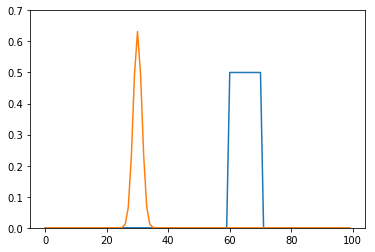

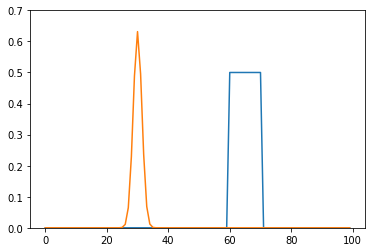

30.015004921853603
0.6787168757096651


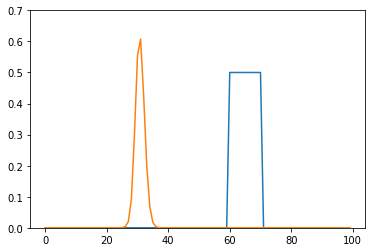

30.760489724436376
0.6778298637859633


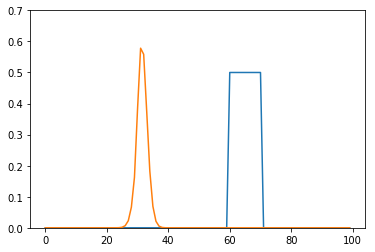

31.49656119961292
0.6793851890544859


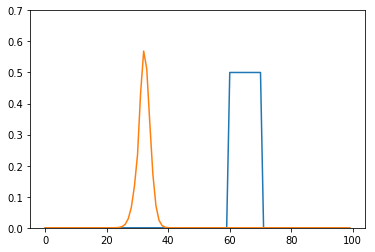

32.2231114522407
0.6755576033453268


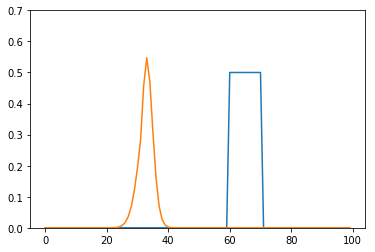

32.940042170009306
0.6666874196113249


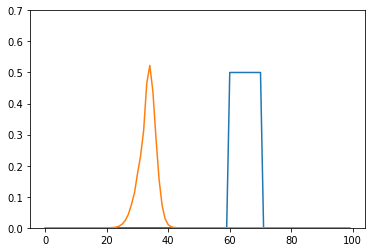

33.64726473436129
0.6559198784903454


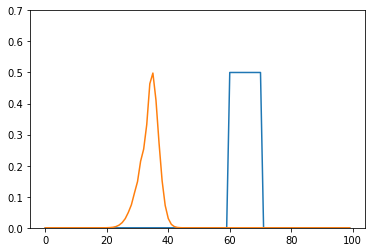

34.34470029865563
0.6443994804117604


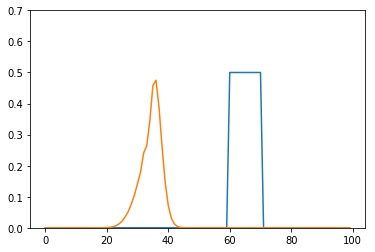

35.03227983370075
0.6329849632833048


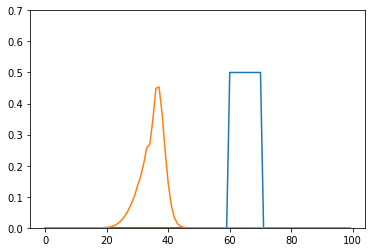

35.70994414098784
0.6220949623476947


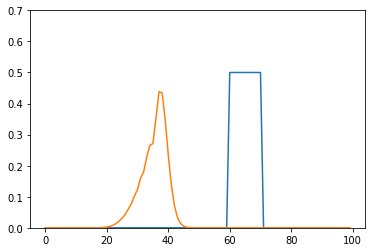

36.377643834155855
0.6118826228003953


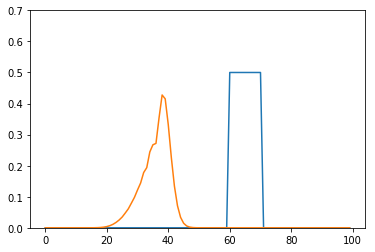

37.035339289408775
0.6023668888148735


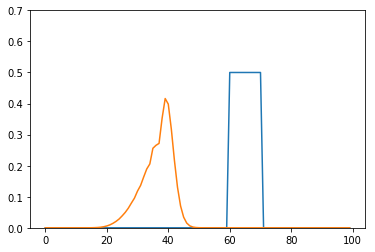

37.68300056578522
0.5933959952160037


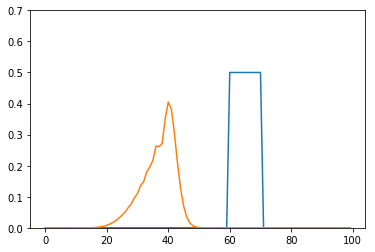

38.320607296347355
0.584914874663702


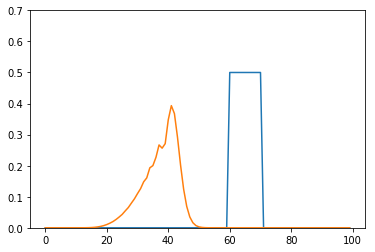

38.94814855150886
0.5768408939133352


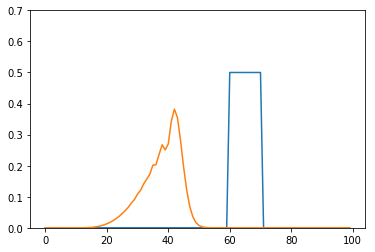

39.56562267586042
0.5690796349915385


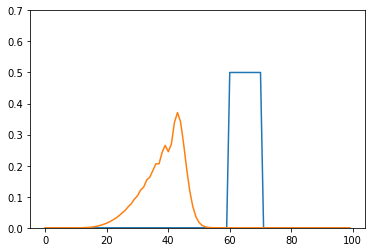

40.17303709997425
0.5615803045241782


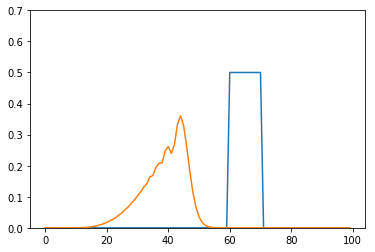

40.77040812877455
0.554305804146983


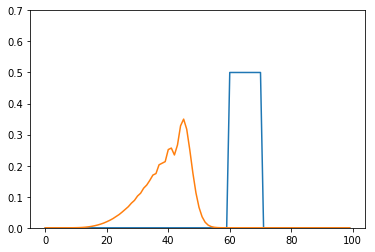

41.35776070815156
0.5472178527945457


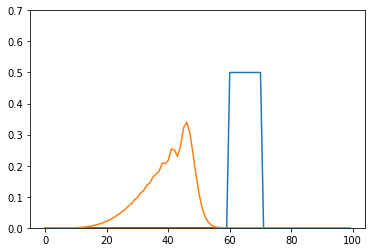

41.93512817156356
0.5402911815273691


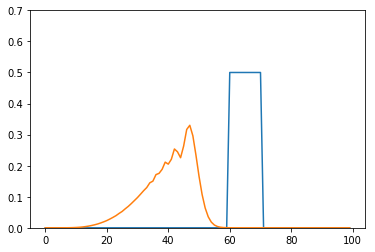

42.50255196836964
0.5335075868503898


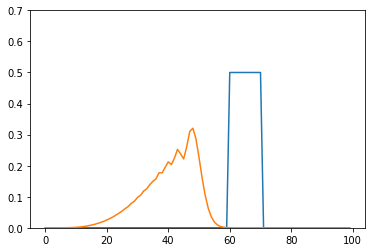

43.060081375192624
0.526847752206319


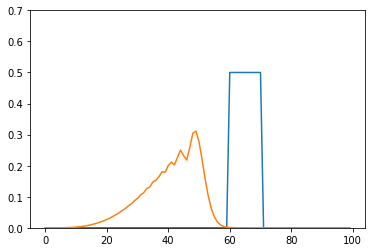

43.60777318835719
0.5202989354618857


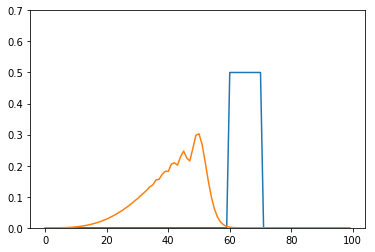

44.14569137752941
0.5138519346395517


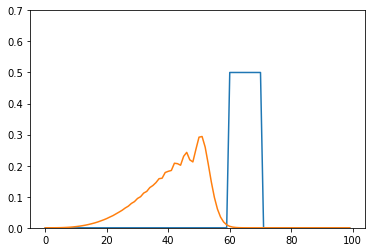

44.67390660155779
0.5074983787153996


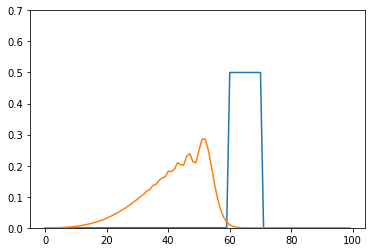

45.19249520915505
0.5012342088097079


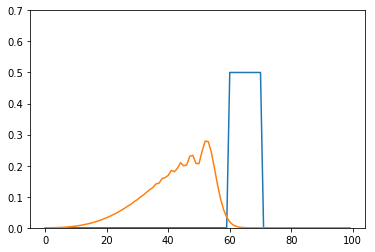

45.70153659025372
0.49505630673520146


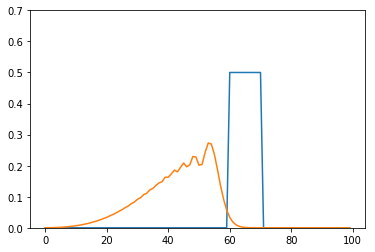

46.201106280811786
0.48896558362996007


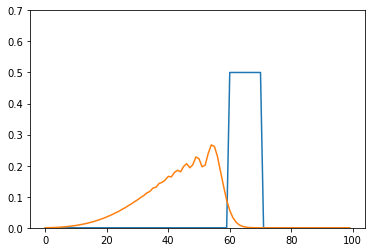

46.691260808983465
0.48297601025021164


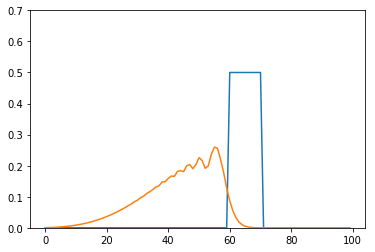

47.17201237853761
0.4771257034317799


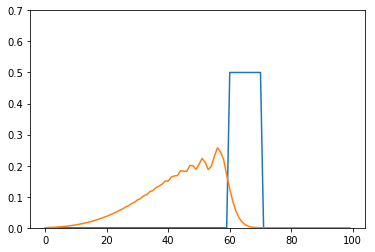

47.64330352476206
0.4715040885179729


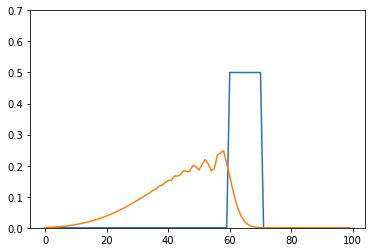

48.1050162741527
0.4662930062912743


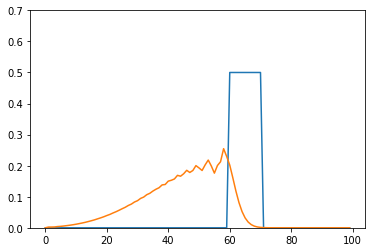

48.557069646269355
0.46177055619230073


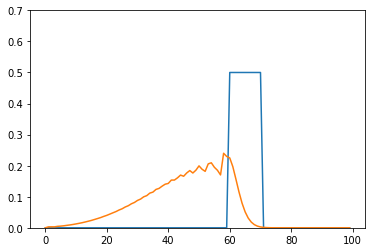

48.9996292014915
0.45833913697704914


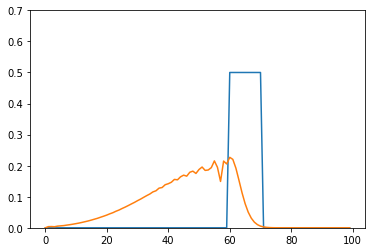

49.43334007093009
0.45627026677755533


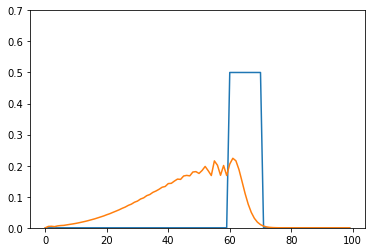

49.859363897017865
0.45558843915903946


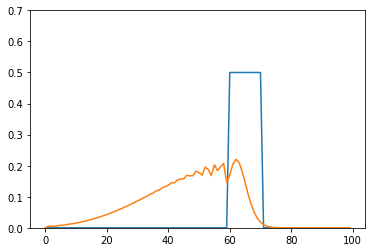

50.279032108716045
0.455819327679449


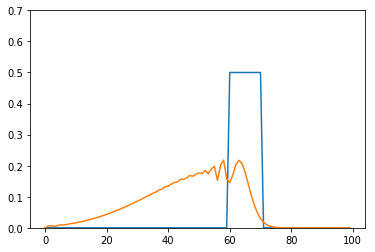

50.6932415407538
0.45644951708277987


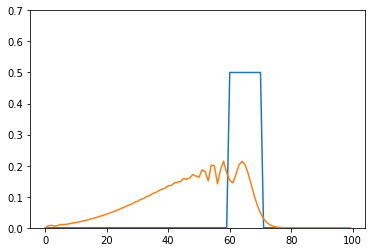

51.102087915718236
0.4569191767653638


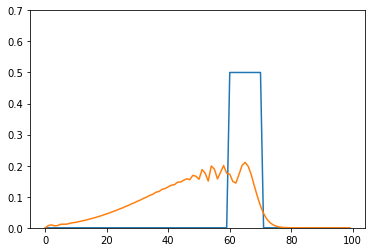

51.505155632288826
0.4572370657884382


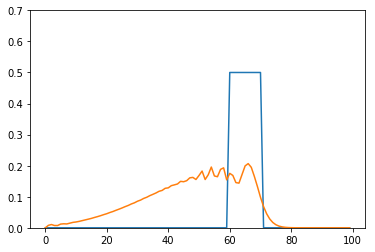

51.902215849321024
0.45794998376502444


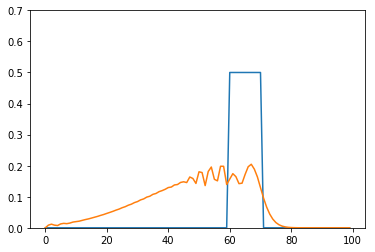

52.29353168261927
0.45809877466149773


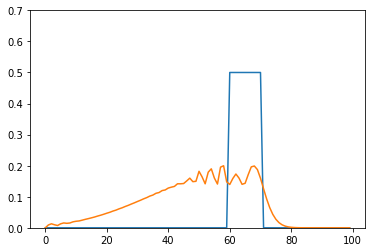

52.67938304213621
0.4584428908740975


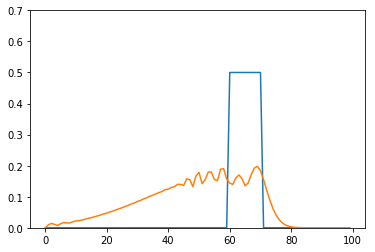

53.05945713394219
0.4581084122441744


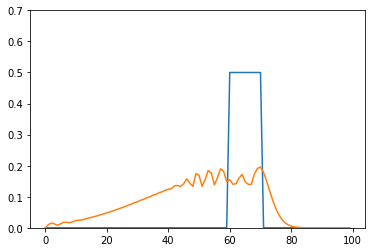

53.43297215166855
0.45710968115917316


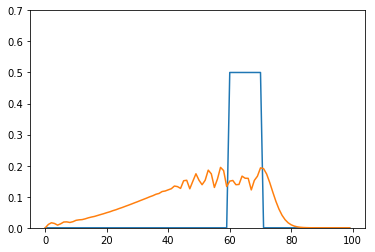

53.79935433578349
0.45528011140836605


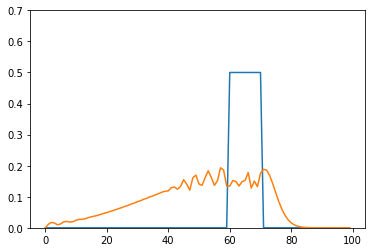

54.158495454213934
0.45225035379764317


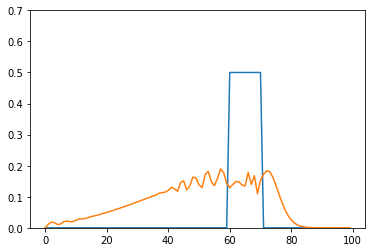

54.51035204992311
0.4493812307517674


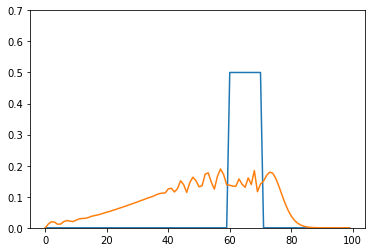

54.85470058559067
0.4459394729492927


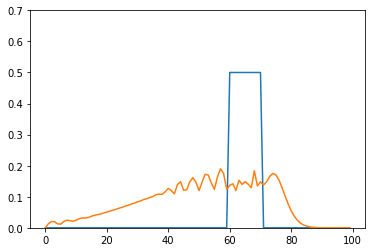

55.19143970268756
0.44245291224363364


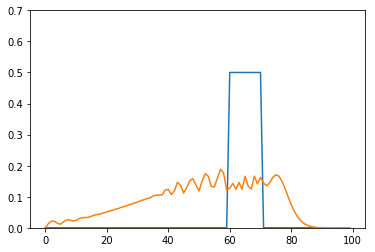

55.52075197893359
0.43881378624894907


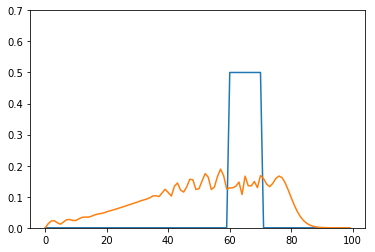

55.84274629067764
0.43503083201513776


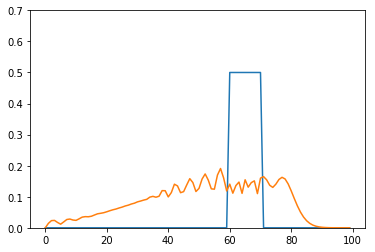

56.157311495708406
0.43138313288894586


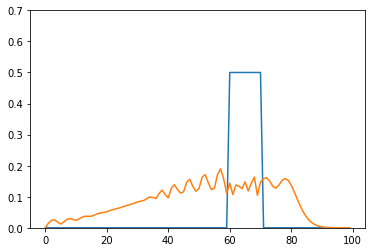

56.464598583209
0.42786960668305946


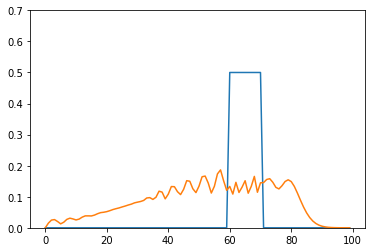

56.76529353869525
0.424036852369434


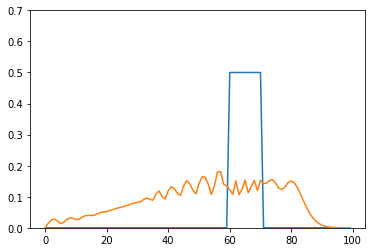

57.06008034531237
0.41966427381033417


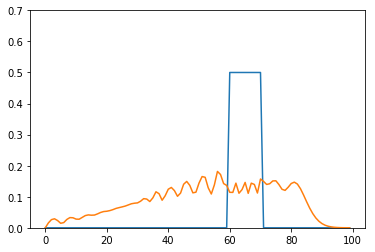

57.349069139155795
0.4154743559358357


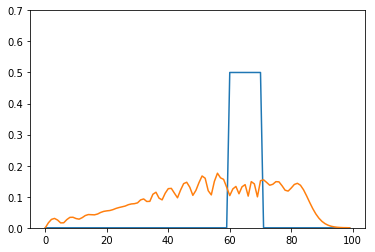

57.63194081111268
0.4110327757834073


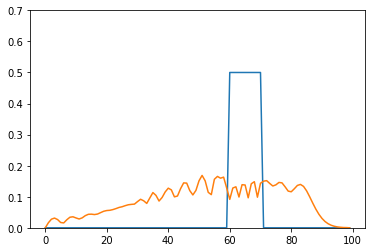

57.908329558685246
0.4068640637431535


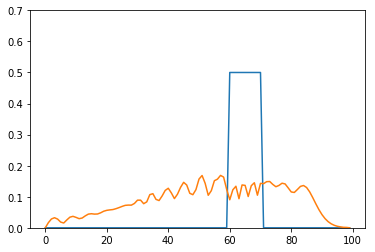

58.17788060514084
0.40263069889750935


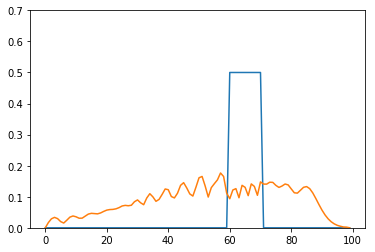

58.44027734862099
0.3981062397236639


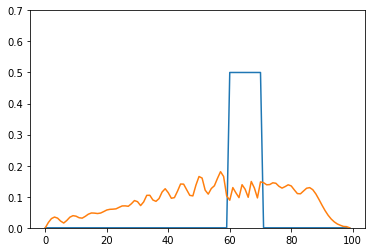

58.69541132382403
0.3948874502391982


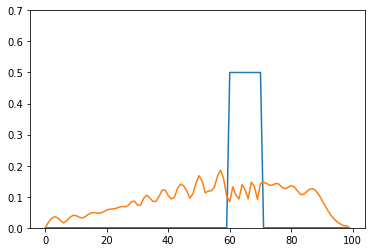

58.94330162252306
0.39088535001791963


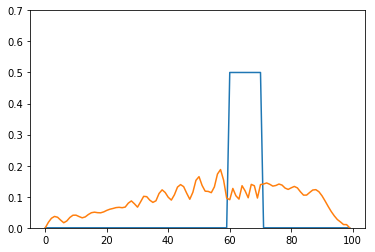

59.1838365344903
0.38712002409837454


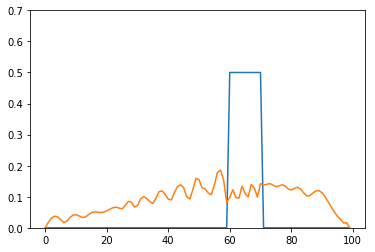

59.416866197264326
0.38299083672859435


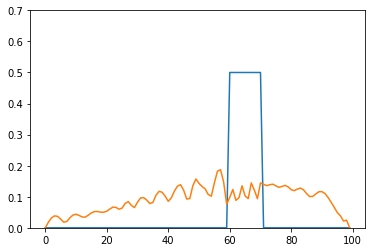

59.64246268276434
0.3787677078566983


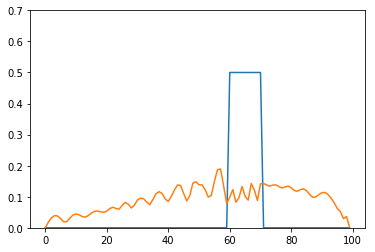

59.8607665030797
0.37450715614164953


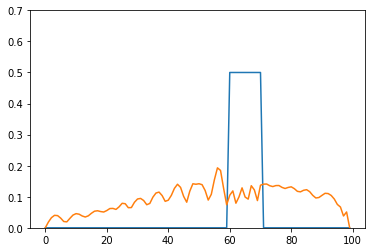

60.07164585268885
0.37052408664623887


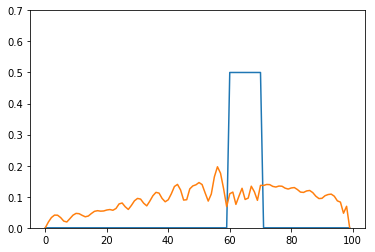

60.27469316636433
0.36664591505696087


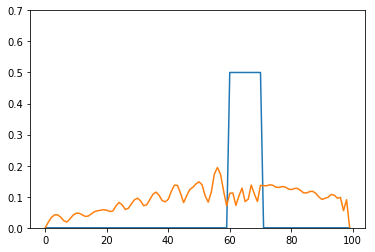

60.46930350709019
0.3630348301545173


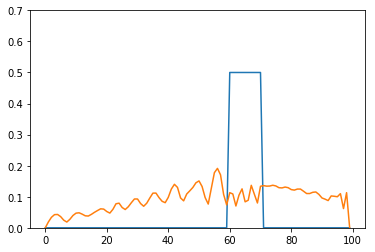

60.65445955087157
0.3591890918180867


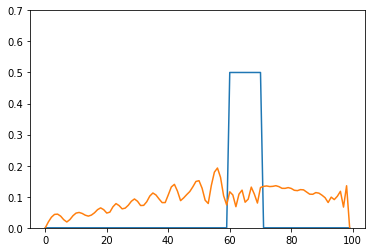

60.82858449186776
0.355164845221656


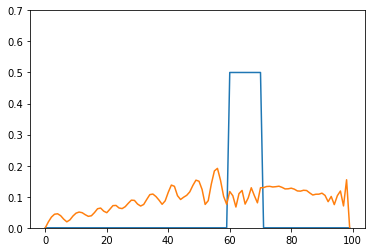

60.989826097591134
0.3510469127741498


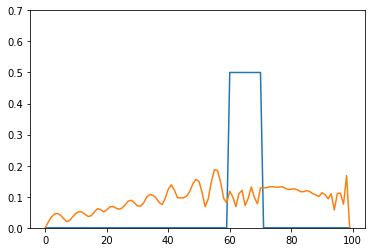

61.13654455714182
0.34735552949361154


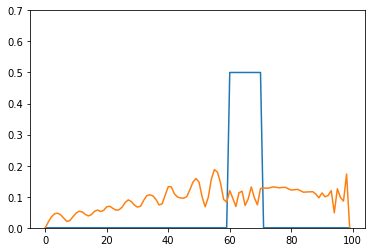

61.267817989655114
0.34378011091781135


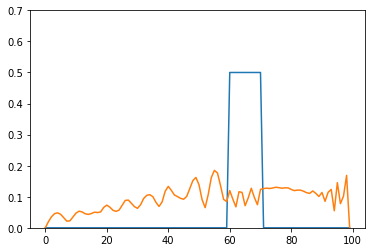

61.38397668824573
0.3405441175469083


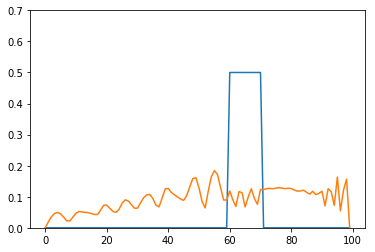

61.48681303947688
0.33725941965686423


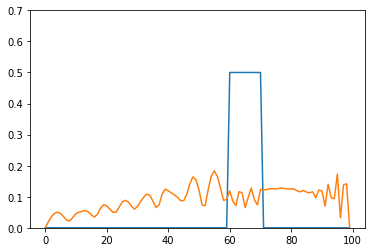

61.57905425619105
0.33413092197126526


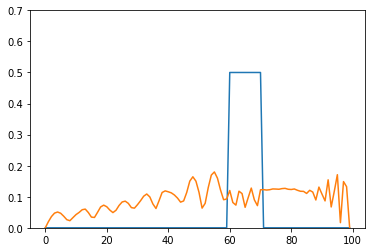

61.66333099319116
0.33129858015752867


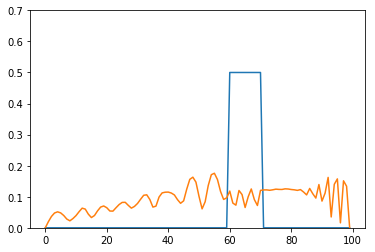

61.74124251705546
0.3285931707527359


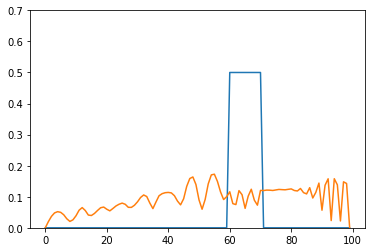

61.81295616971512
0.3256543982629716


In [46]:
import numpy as np
import matplotlib.pyplot as plt

D = 1.0
INIT_X_MU = 30
INIT_P_MU = 400
MAX_TIME = 4000
DT = 0.02

ys_t = []
ys_abs_t = []

def initial_wave_func(x, d, x_mu, p_mu):
    return (1 / (2.0 * np.pi * d**2)**(1/4)) * np.exp(-(x-x_mu)**2 / (4.0 * d**2)) * (np.cos(p_mu * x) + 1j*np.sin(p_mu * x))

def V(x):
    POTENTIAL_H = 0.5
    return POTENTIAL_H if x >= 60 and x <= 70 else 0
    #return 0

def x_mean(xs, ys):
    return sum(abs(np.conj(ys)*xs*ys))

def p_mean(xs, ys):
    ys_grad = np.gradient(np.gradient(ys))
    return sum(abs(np.conj(ys)*(1j)*ys_grad))

def calc_next_state(xs, ys):
    assert (len(xs) == len(ys)), 'dimension xs and ys does not match.{} != {}'.format(len(xs), len(ys))
    next_state = []
    for i, (x,y) in enumerate(zip(xs, ys)):
        if i == 0 or i == len(ys)-1:
            next_state.append(0+0j)
        else:
            next_state.append(ys[i] - (0.5j)*((ys[i-1] - 2*ys[i] + ys[i+1]) - V(x)*ys[i])*DT)
            
    next_state = np.array(next_state)
            
    next_state /= sum(abs(next_state*next_state))**(1/2)
    return next_state


xs = np.array([i for i in range(100)])
ys = np.array(list(map(lambda x: initial_wave_func(x, D, INIT_X_MU, INIT_P_MU), xs)))
# 規格化
ys /= sum(abs(ys*ys))**(1/2)
ys_t.append(ys.copy())

ys_abs = list(map(lambda x: abs(x), ys))
ys_abs_t.append(ys_abs.copy())

plt.ylim([0, 0.7])

plt.plot(xs, [V(x) for x in xs])
plt.plot(xs, ys_abs)
plt.show()

for t in range(MAX_TIME):
    #print(ys_t[-1])
    ys = calc_next_state(xs, ys_t[-1])
    ys_t.append(ys.copy())
    ys_abs = list(map(lambda x: abs(x), ys))
    ys_abs_t.append(ys_abs.copy())
    
    if t % 50 == 0:
        plt.ylim([0, 0.7])
        # ポテンシャル壁プロット
        plt.plot(xs, [V(x) for x in xs])
        # 波束プロット
        plt.plot(xs, ys_abs)
        plt.show()
        print(x_mean(xs, ys))
        print(p_mean(xs, ys))
    
    
ys_abs_grad = np.gradient(ys_abs)
ys_grad = np.gradient(ys)

30.228161104316012
0.7231910407570527
30.64037393459556
0.49592474096571126
30.76249938412808
0.37735876860239453
30.823730320059646
0.30880798366347006
30.86098373725142
0.2642051920321613
30.88613952460814
0.23276869967841984
30.904298489829323
0.20933436967850894
30.918035035570632
0.19113113226312295
30.92879438077465
0.17654023563599533
30.93745221102366
0.16455244951996417
30.944570709731877
0.15450542395840228
30.950527593695725
0.14594607709212173
30.95558615788225
0.13855371967618313
30.959935611308776
0.13209478891385515
30.96371545289977
0.12639499702154852
30.967030807177988
0.1213215443897128
30.969962407446225
0.1167713913204912
30.972573288377813
0.11266330719408826
30.974913389447718
0.10893234796558272
30.9770227952685
0.10552593729251508
30.97893406715042
0.10240103225560111
30.98067396208668
0.09952203843199188
30.982264747262228
0.09685925267632339
30.98372528708269
0.09438768393204368
30.985072130724397
0.09208614918841417
30.986321074713157
0.0899365734885518
30.9

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\matplotlib\animation.py:1218: UserWarning: MovieWriter imagemagick unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


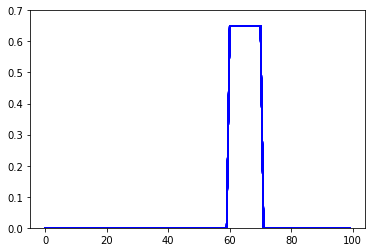

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

D = 1.0
INIT_X_MU = 30
INIT_P_MU = 400
MAX_TIME = 300
DT = 1

ys_t = []
ys_abs_t = []

def initial_wave_func(x, d, x_mu, p_mu):
    return (1 / (2.0 * np.pi * d**2)**(1/4)) * np.exp(-(x-x_mu)**2 / (4.0 * d**2)) * (np.cos(p_mu * x) + 1j*np.sin(p_mu * x))

def V(x):
    POTENTIAL_H = 0.65
    return POTENTIAL_H if x >= 60 and x <= 70 else 0
    #return 0

def x_mean(xs, ys):
    return sum(abs(np.conj(ys)*xs*ys))

def p_mean(xs, ys):
    ys_grad = np.gradient(ys)
    return sum(abs(np.conj(ys)*(1j)*ys_grad))

def calc_next_state(xs, ys):
    assert (len(xs) == len(ys)), 'dimension xs and ys does not match.{} != {}'.format(len(xs), len(ys))
    next_state = []
    for i, (x,y) in enumerate(zip(xs, ys)):
        if i == 0 or i == len(ys)-1:
            next_state.append(0+0j)
        else:
            next_state.append(ys[i] - (0.5j)*((ys[i-1] - 2*ys[i] + ys[i+1]) - V(x)*ys[i])*DT)
            
    next_state = np.array(next_state)
            
    next_state /= sum(abs(next_state*next_state))**(1/2)
    return next_state


fig = plt.figure()
ims = []

xs = np.array([i for i in range(100)])
ys = np.array(list(map(lambda x: initial_wave_func(x, D, INIT_X_MU, INIT_P_MU), xs)))
# 規格化
ys /= sum(abs(ys*ys))**(1/2)
ys_t.append(ys.copy())

ys_abs = list(map(lambda x: abs(x), ys))
ys_abs_t.append(ys_abs.copy())


plt.ylim([0, 0.7])
plt.plot(xs, [V(x) for x in xs], color='blue')
ims.append(plt.plot(xs, ys_abs, color='red'))
#plt.show()

for t in range(MAX_TIME):
    #print(ys_t[-1])
    ys = calc_next_state(xs, ys_t[-1])
    ys_t.append(ys.copy())
    ys_abs = list(map(lambda x: abs(x), ys))
    ys_abs_t.append(ys_abs.copy())
    
    if t % 5 == 0:
        #plt.clf()
        plt.ylim([0, 0.7])
        # ポテンシャル壁プロット
        plt.plot(xs, [V(x) for x in xs], color='blue')
        # 波束プロット
        ims.append(plt.plot(xs, ys_abs, color='red'))
        #plt.show()
        print(x_mean(xs, ys))
        print(p_mean(xs, ys))
        
ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=1000)
ani.save("test.html", writer="imagemagick")

ValueError: x and y must have same first dimension, but have shapes (4,) and (2, 4)

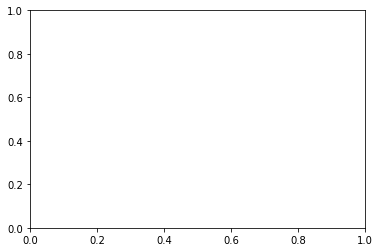

In [28]:
plt.plot([1,2,3,4], [[1,2,3,4], [4,3,2,1]])

30.003754453396827
0.7790744289480411
30.75347548035824
0.7803904864715766
31.50086378614463
0.7841337100980751
32.24591191726309
0.7847107264155141
32.98861256674269
0.7810102267985154
33.728958574814925
0.7756097740465091
34.46694292956346
0.7705955161701052
35.202558767541326
0.7663777464126007
35.935799374356634
0.7627981180908003
36.666658185226055
0.7597301226651807
37.39512878549675
0.7570574257326347
38.12120491113544
0.7546747514618338
38.84488044918625
0.7525237329814338
39.56614943819565
0.7505570013733199
40.28500606860551
0.7487234929442853
41.00144468311392
0.746997274842266
41.71545977699836
0.7453563653364981
42.42704599832854
0.7437782489882286
43.1361981471844
0.7422590901240413
43.84291116534914
0.7407888223094736
44.547180049688926
0.7393542276168663
45.24899926084647
0.737952582287171
45.948359362896646
0.7365696260896315
46.64523100977099
0.7351738151575226
47.339500763588376
0.7336656814930024
48.0307549080014
0.7317018743232483
48.71767096322512
0.72834221754254

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\matplotlib\animation.py:1218: UserWarning: MovieWriter imagemagick unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


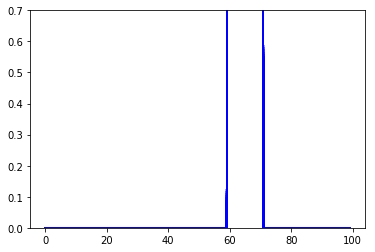

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

D = 1.0
INIT_X_MU = 30
INIT_P_MU = 400
MAX_TIME = 20000
DT = 0.005

ys_t = []
ys_abs_t = []

def initial_wave_func(x, d, x_mu, p_mu):
    return (1 / (2.0 * np.pi * d**2)**(1/4)) * np.exp(-(x-x_mu)**2 / (4.0 * d**2)) * (np.cos(p_mu * x) + 1j*np.sin(p_mu * x))

def V(x):
    POTENTIAL_H = 5.65
    return POTENTIAL_H if x >= 60 and x <= 70 else 0
    #return 0

def x_mean(xs, ys):
    return sum(abs(np.conj(ys)*xs*ys))

def p_mean(xs, ys):
    ys_grad = np.gradient(ys)
    return sum(abs(np.conj(ys)*(1j)*ys_grad))

def calc_next_state(xs, ys):
    assert (len(xs) == len(ys)), 'dimension xs and ys does not match.{} != {}'.format(len(xs), len(ys))
    next_state = []
    for i, (x,y) in enumerate(zip(xs, ys)):
        if i == 0 or i == len(ys)-1:
            next_state.append(0+0j)
        else:
            next_state.append(ys[i] - (0.5j)*((ys[i-1] - 2*ys[i] + ys[i+1]) - V(x)*ys[i])*DT)
            
    next_state = np.array(next_state)
            
    next_state /= sum(abs(next_state*next_state))**(1/2)
    return next_state


fig = plt.figure()
ims = []

xs = np.array([i for i in range(100)])
ys = np.array(list(map(lambda x: initial_wave_func(x, D, INIT_X_MU, INIT_P_MU), xs)))
# 規格化
ys /= sum(abs(ys*ys))**(1/2)
ys_t.append(ys.copy())

ys_abs = list(map(lambda x: abs(x), ys))
ys_abs_t.append(ys_abs.copy())


plt.ylim([0, 0.7])
plt.plot(xs, [V(x) for x in xs], color='blue')
ims.append(plt.plot(xs, ys_abs, color='red'))
#plt.show()

for t in range(MAX_TIME):
    #print(ys_t[-1])
    ys = calc_next_state(xs, ys_t[-1])
    ys_t.append(ys.copy())
    ys_abs = list(map(lambda x: abs(x), ys))
    ys_abs_t.append(ys_abs.copy())
    
    if t % 200 == 0:
        #plt.clf()
        plt.ylim([0, 0.7])
        # ポテンシャル壁プロット
        plt.plot(xs, [V(x) for x in xs], color='blue')
        # 波束プロット
        ims.append(plt.plot(xs, ys_abs, color='red'))
        #plt.show()
        print(x_mean(xs, ys))
        print(p_mean(xs, ys))
        
ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=1000)
ani.save("test3.html", writer="imagemagick")

30.003754453100065
0.7790744418173456
30.753568462567788
0.7806642823445024
31.50159711491157
0.7851589138467633
32.24837443628299
0.786904677818935
32.994429261709946
0.7848488315685528
33.74027939827385
0.7816580645274538
34.4864258024245
0.7794338410477855
35.23334673756935
0.7785241904313905
35.98149188109525
0.7787290330931337
36.73127635393578
0.7798842345851746
37.483074650718656
0.7818127273899278
38.237214454472365
0.784363517501362
38.99397032687937
0.7874276251302917
39.753557273202006
0.7908849111616306
40.516124190304915
0.7946180491540663
41.28174721669379
0.7985231176043048
42.050423015177934
0.802484391447485
42.82206203160967
0.8063991372438017
43.596481787073564
0.8101741072831833
44.37340027574672
0.8136906195751805
45.15242955621315
0.8168302926075368
45.933069639998074
0.8194787876666915
46.714702797157194
0.8215133018170018
47.49658841464135
0.8228297737037903
48.27785855905177
0.8233171687510249
49.05751441275388
0.8228171789280061
49.83442377486498
0.82115809938

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\matplotlib\animation.py:1218: UserWarning: MovieWriter imagemagick unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


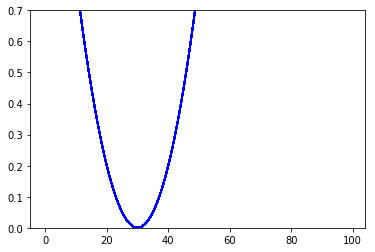

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

D = 1.0
INIT_X_MU = 30
INIT_P_MU = 400
MAX_TIME = 20000
DT = 0.005

ys_t = []
ys_abs_t = []

def initial_wave_func(x, d, x_mu, p_mu):
    return (1 / (2.0 * np.pi * d**2)**(1/4)) * np.exp(-(x-x_mu)**2 / (4.0 * d**2)) * (np.cos(p_mu * x) + 1j*np.sin(p_mu * x))

def V(x):
    POTENTIAL_H = 5.65
    return POTENTIAL_H if x >= 60 and x <= 70 else 0
    #return 0
    
def V2(x):
    return 0.002*(x-INIT_X_MU)**2

def x_mean(xs, ys):
    return sum(abs(np.conj(ys)*xs*ys))

def p_mean(xs, ys):
    ys_grad = np.gradient(ys)
    return sum(abs(np.conj(ys)*(1j)*ys_grad))

def calc_next_state(xs, ys):
    assert (len(xs) == len(ys)), 'dimension xs and ys does not match.{} != {}'.format(len(xs), len(ys))
    next_state = []
    for i, (x,y) in enumerate(zip(xs, ys)):
        if i == 0 or i == len(ys)-1:
            next_state.append(0+0j)
        else:
            #next_state.append(ys[i] - (0.5j)*((ys[i-1] - 2*ys[i] + ys[i+1]) - V(x)*ys[i])*DT)
            next_state.append(ys[i] - (0.5j)*((ys[i-1] - 2*ys[i] + ys[i+1]) - V2(x)*ys[i])*DT)
            
    next_state = np.array(next_state)
            
    next_state /= sum(abs(next_state*next_state))**(1/2)
    return next_state


fig = plt.figure()
ims = []

xs = np.array([i for i in range(100)])
ys = np.array(list(map(lambda x: initial_wave_func(x, D, INIT_X_MU, INIT_P_MU), xs)))
# 規格化
ys /= sum(abs(ys*ys))**(1/2)
ys_t.append(ys.copy())

ys_abs = list(map(lambda x: abs(x), ys))
ys_abs_t.append(ys_abs.copy())


plt.ylim([0, 0.7])
plt.plot(xs, [V2(x) for x in xs], color='blue')
ims.append(plt.plot(xs, ys_abs, color='red'))
#plt.show()

for t in range(MAX_TIME):
    #print(ys_t[-1])
    ys = calc_next_state(xs, ys_t[-1])
    ys_t.append(ys.copy())
    ys_abs = list(map(lambda x: abs(x), ys))
    ys_abs_t.append(ys_abs.copy())
    
    if t % 200 == 0:
        #plt.clf()
        plt.ylim([0, 0.7])
        # ポテンシャル壁プロット
        plt.plot(xs, [V2(x) for x in xs], color='blue')
        # 波束プロット
        ims.append(plt.plot(xs, ys_abs, color='red'))
        #plt.show()
        print(x_mean(xs, ys))
        print(p_mean(xs, ys))
        
ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=1000)
ani.save("test4.html", writer="imagemagick")